In [1]:
import numpy as na
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib
!pip install pandas
!pip install numpy

In [3]:
dataset=pd.read_csv(r"C:\Users\Praveen K\Downloads\Salary_dataset.csv")

In [4]:
dataset.head(10)

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [ ]:
dataset.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
dataset.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


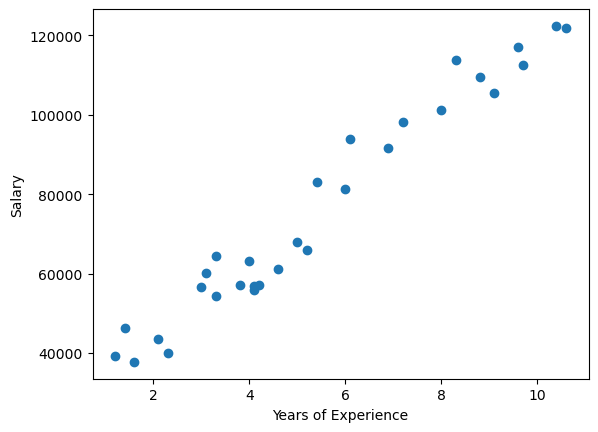

In [24]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [25]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [26]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [27]:
y

array([ 39344,  46206,  37732,  43526,  39892,  56643,  60151,  54446,
        64446,  57190,  63219,  55795,  56958,  57082,  61112,  67939,
        66030,  83089,  81364,  93941,  91739,  98274, 101303, 113813,
       109432, 105583, 116970, 112636, 122392, 121873], dtype=int64)

In [28]:
 from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [30]:
x_train.size

20

In [31]:
x_test

array([[ 6.9],
       [ 8.8],
       [ 3.3],
       [ 6. ],
       [ 1.6],
       [ 9.7],
       [ 9.6],
       [ 5.2],
       [ 9.1],
       [10.4]])

In [32]:
y_train

array([ 63219,  43526,  46206,  93941, 101303,  56958,  56643,  61112,
        39344,  98274,  39892,  64446,  57082,  57190,  67939, 121873,
       113813,  60151,  83089,  55795], dtype=int64)

In [33]:
y_test

array([ 91739, 109432,  54446,  81364,  37732, 112636, 116970,  66030,
       105583, 122392], dtype=int64)

Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [35]:
LR.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred_LR=LR.predict(x_test)

In [37]:
x_test

array([[ 6.9],
       [ 8.8],
       [ 3.3],
       [ 6. ],
       [ 1.6],
       [ 9.7],
       [ 9.6],
       [ 5.2],
       [ 9.1],
       [10.4]])

In [38]:
y_test

array([ 91739, 109432,  54446,  81364,  37732, 112636, 116970,  66030,
       105583, 122392], dtype=int64)

In [39]:
y_pred_LR

array([ 91478.92796603, 109894.22802466,  56586.7804865 ,  82755.89109615,
        40109.93306562, 118617.26489454, 117648.03857567,  75002.08054514,
       112801.90698129, 125401.84912667])

In [40]:
diff_LR=y_test-y_pred_LR

In [41]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Origiinal Data','Diff']

In [42]:
res_df

,Prediction,Origiinal Data,Diff
0,91478.927966,91739,260.072034
1,109894.228025,109432,-462.228025
2,56586.780487,54446,-2140.780487
3,82755.891096,81364,-1391.891096
4,40109.933066,37732,-2377.933066
5,118617.264895,112636,-5981.264895
6,117648.038576,116970,-678.038576
7,75002.080545,66030,-8972.080545
8,112801.906981,105583,-7218.906981
9,125401.849127,122392,-3009.849127


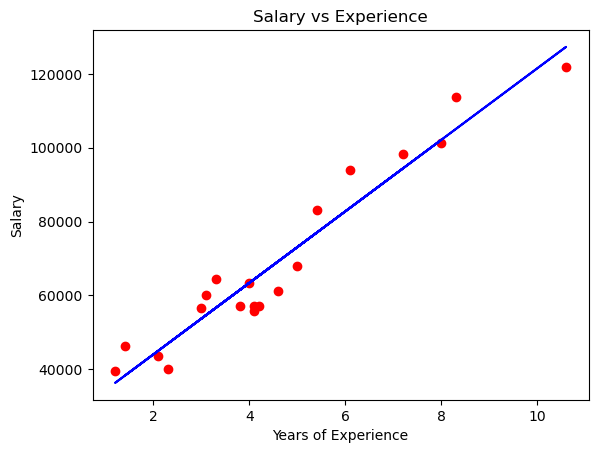

In [43]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,LR.predict(x_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

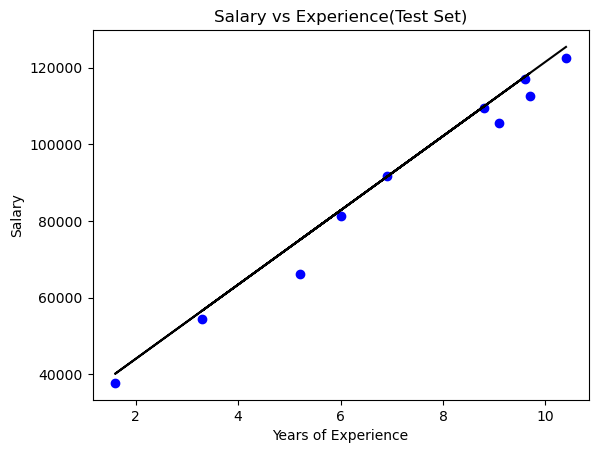

In [44]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,LR.predict(x_test),color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience(Test Set)')
plt.show()

In [45]:
from sklearn import metrics
rmse= na.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
R2=metrics.r2_score(y_test,y_pred_LR)

In [46]:
rmse

4363.04326034327

In [57]:
R2

0.974811112371526

In [48]:
LR.predict([[6]])

array([82755.89109615])

Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
import warnings
warnings.filterwarnings("ignore")


In [50]:
DT=DecisionTreeRegressor()

In [51]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred_dt=DT.predict(x_test)

In [53]:
y_pred_dt

array([ 98274., 113813.,  64446.,  93941.,  46206., 121873., 121873.,
        67939., 113813., 121873.])

In [54]:
diff_dt=y_test-y_pred_dt

In [55]:
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_dt)],axis=1)
res_dt.columns=['Prediction','Origiinal Data','Diff']

In [56]:
res_dt

,Prediction,Origiinal Data,Diff
0,98274.0,91739,-6535.0
1,113813.0,109432,-4381.0
2,64446.0,54446,-10000.0
3,93941.0,81364,-12577.0
4,46206.0,37732,-8474.0
5,121873.0,112636,-9237.0
6,121873.0,116970,-4903.0
7,67939.0,66030,-1909.0
8,113813.0,105583,-8230.0
9,121873.0,122392,519.0


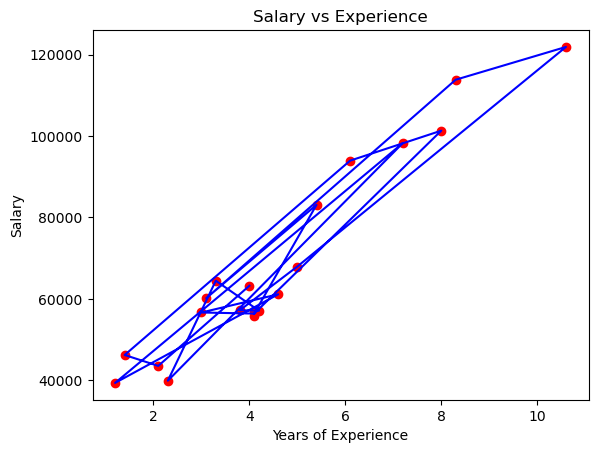

In [62]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,DT.predict(x_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()